## 讀檔案，載入資料

In [13]:
import json
def load_json(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        return {item['cuisine_id']: item for item in json.load(f)}

gt_file = 'ground_truth.json'
gpt_file = 'response_gpt.json'
gemini_file = 'response_gemini.json'
claude_file = 'response_claude.json'

gt_data = load_json(gt_file)
gpt_data = load_json(gpt_file)
gemini_data = load_json(gemini_file)
claude_data = load_json(claude_file)

print(gt_data)
print(gpt_data)
print(gemini_data)
print(claude_data)

{1: {'cuisine_id': 1, 'cuisine_url': 'https://icook.tw/recipes/455986', 'cuisine_name': '滷肉飯', 'ingredients': [{'ingredient': '五花肉', 'amount': '2000', 'unit': '克'}, {'ingredient': '洋蔥', 'amount': '2', 'unit': '顆'}, {'ingredient': '紅蔥頭末', 'amount': '50', 'unit': '克'}, {'ingredient': '蒜末', 'amount': '50', 'unit': '克'}, {'ingredient': '五香粉', 'amount': '1', 'unit': '小匙'}, {'ingredient': '醬油', 'amount': '1', 'unit': '杯'}, {'ingredient': '油膏', 'amount': '0.5', 'unit': '杯'}, {'ingredient': '紹興酒', 'amount': '4', 'unit': '大匙'}, {'ingredient': '冰糖', 'amount': '50', 'unit': '克'}], 'cooking_instructions': '小黃瓜洗淨後，去除頭尾，然後以菜刀拍碎; 將拍碎的小黃瓜切小段; 加入細砂糖拌勻，去菁15分鐘; 辣椒清洗後切成辣椒圈; 蒜頭清洗後切成蒜末; 用手將小黃瓜多餘的水份擠出，然後倒掉; 加入辣椒圈和蒜末; 加入醬油; 加入烏醋; 加入鹽; 淋上加熱後的植物油(淋熱油); 將所有食材拌勻即可食用; 於冰箱醃漬2小時以上會更入味更好吃; ', 'quantity': 10}, 2: {'cuisine_id': 2, 'cuisine_url': 'https://icook.tw/recipes/391516', 'cuisine_name': '滷肉飯', 'ingredients': [{'ingredient': '豬五花肉', 'amount': '1000', 'unit': '克'}, {'ingredient': '蒜頭', 'amount': '3', 'unit': '顆

## 資料整理

### ingredients 變成 sentence 

In [14]:
# {id:" ", ing:" "}
gt_ing_sentence_dic = {}
gpt_ing_sentence_dic = {}
gemini_ing_sentence_dic = {}
claude_ing_sentence_dic = {}

def ingredients_to_sentence (data):
    ing_sentence = {}
    for item in data:
        sentence = ""
        for ingredient_list in data[item]['ingredients']:
            sentence = sentence + ingredient_list['ingredient'] + " "
        ing_sentence[item] = sentence
    return ing_sentence

gt_ing_sentence_dic = ingredients_to_sentence(gt_data)
gpt_ing_sentence_dic = ingredients_to_sentence(gpt_data)
gemini_ing_sentence_dic = ingredients_to_sentence(gemini_data)
claude_ing_sentence_dic = ingredients_to_sentence(claude_data)

### Instruction 變成 sentence

In [15]:
# {id:" ", instrc:" "}
gt_instrc_sentence_dic = {}
gpt_instrc_sentence_dic = {}
gemini_instrc_sentence_dic = {}
claude_instrc_sentence_dic = {}

def instructions_to_sentence (data):
    print(data)
    instrc_sentence = {}
    for item in data:
        print(data[item]['cooking_instructions'])
        instrc_sentence[item] = data[item]['cooking_instructions']
    return instrc_sentence

gt_instrc_sentence_dic = instructions_to_sentence(gt_data)
gpt_instrc_sentence_dic = instructions_to_sentence(gpt_data)
gemini_instrc_sentence_dic = instructions_to_sentence(gemini_data)
claude_instrc_sentence_dic = instructions_to_sentence(claude_data)


{1: {'cuisine_id': 1, 'cuisine_url': 'https://icook.tw/recipes/455986', 'cuisine_name': '滷肉飯', 'ingredients': [{'ingredient': '五花肉', 'amount': '2000', 'unit': '克'}, {'ingredient': '洋蔥', 'amount': '2', 'unit': '顆'}, {'ingredient': '紅蔥頭末', 'amount': '50', 'unit': '克'}, {'ingredient': '蒜末', 'amount': '50', 'unit': '克'}, {'ingredient': '五香粉', 'amount': '1', 'unit': '小匙'}, {'ingredient': '醬油', 'amount': '1', 'unit': '杯'}, {'ingredient': '油膏', 'amount': '0.5', 'unit': '杯'}, {'ingredient': '紹興酒', 'amount': '4', 'unit': '大匙'}, {'ingredient': '冰糖', 'amount': '50', 'unit': '克'}], 'cooking_instructions': '小黃瓜洗淨後，去除頭尾，然後以菜刀拍碎; 將拍碎的小黃瓜切小段; 加入細砂糖拌勻，去菁15分鐘; 辣椒清洗後切成辣椒圈; 蒜頭清洗後切成蒜末; 用手將小黃瓜多餘的水份擠出，然後倒掉; 加入辣椒圈和蒜末; 加入醬油; 加入烏醋; 加入鹽; 淋上加熱後的植物油(淋熱油); 將所有食材拌勻即可食用; 於冰箱醃漬2小時以上會更入味更好吃; ', 'quantity': 10}, 2: {'cuisine_id': 2, 'cuisine_url': 'https://icook.tw/recipes/391516', 'cuisine_name': '滷肉飯', 'ingredients': [{'ingredient': '豬五花肉', 'amount': '1000', 'unit': '克'}, {'ingredient': '蒜頭', 'amount': '3', 'unit': '顆

## 食材種類正確性

### bert_base_chinese

In [16]:
from transformers import AutoTokenizer, AutoModel
import torch
import torch.nn.functional as F


In [17]:
gpt_ing_bert_base_chinese = []
gemini_ing_bert_base_chinese = []
claude_ing_bert_base_chinese = []

def bert_base_chinese_for_ing_sentence(gt_ing_sentence, model_ing_sentence):
    print(gt_ing_sentence)
    print(model_ing_sentence)
    
    tokenizer = AutoTokenizer.from_pretrained("bert-base-chinese")
    model = AutoModel.from_pretrained("bert-base-chinese")


    inputs = tokenizer(gt_ing_sentence, return_tensors="pt", truncation=True, padding=True)
    with torch.no_grad():
        outputs = model(**inputs)
    gt_embedding = outputs.last_hidden_state[:, 0, :]  # shape: [1, hidden_size]

    inputs = tokenizer(model_ing_sentence, return_tensors="pt", truncation=True, padding=True)
    with torch.no_grad():
        outputs = model(**inputs)
    model_embedding = outputs.last_hidden_state[:, 0, :]  # shape: [1, hidden_size]
        
    # 計算餘弦相似度（值域 -1 到 1，越接近 1 越相似）
    similarity = F.cosine_similarity(gt_embedding, model_embedding)
    print(f"相似度: {similarity.item():.4f}")
    return similarity.item()

def get_ing_bert_base_chinese(gt_ing_sentence_dic, model_ing_sentence_dic):
    ing_bert_base_chinese = []
    for gt_id, model_id in zip(gt_ing_sentence_dic, model_ing_sentence_dic):
        sentence1 = gt_ing_sentence_dic[gt_id]
        sentence2 = model_ing_sentence_dic[model_id]
        print(sentence1)
        print(sentence2)
        ing_bert_base_chinese.append(bert_base_chinese_for_ing_sentence(sentence1, sentence2))
    return ing_bert_base_chinese

gpt_ing_bert_base_chinese = get_ing_bert_base_chinese(gt_ing_sentence_dic, gpt_ing_sentence_dic)
gemini_ing_bert_base_chinese = get_ing_bert_base_chinese(gt_ing_sentence_dic, gemini_ing_sentence_dic)
claude_ing_bert_base_chinese = get_ing_bert_base_chinese(gt_ing_sentence_dic, claude_ing_sentence_dic)

print(f'gpt_ing_bert_base_chinese = {gpt_ing_bert_base_chinese}')
print(f'gemini_ing_bert_base_chinese = {gemini_ing_bert_base_chinese}')
print(f'claude_ing_bert_base_chinese = {claude_ing_bert_base_chinese}')

五花肉 洋蔥 紅蔥頭末 蒜末 五香粉 醬油 油膏 紹興酒 冰糖 
五花肉 紅蔥頭 蒜頭 醬油 米酒 冰糖 白胡椒粉 水 滷蛋（可選） 白飯 
五花肉 洋蔥 紅蔥頭末 蒜末 五香粉 醬油 油膏 紹興酒 冰糖 
五花肉 紅蔥頭 蒜頭 醬油 米酒 冰糖 白胡椒粉 水 滷蛋（可選） 白飯 
相似度: 0.9128
豬五花肉 蒜頭 米酒 冰糖 五香粉 香葉 紅蔥頭 醬油 黑糖 白胡椒粉 八角 
五花肉 紅蔥頭 蒜頭 醬油 冰糖 米酒 水 五香粉 白胡椒粉 滷蛋 小黃瓜 白飯 
豬五花肉 蒜頭 米酒 冰糖 五香粉 香葉 紅蔥頭 醬油 黑糖 白胡椒粉 八角 
五花肉 紅蔥頭 蒜頭 醬油 冰糖 米酒 水 五香粉 白胡椒粉 滷蛋 小黃瓜 白飯 
相似度: 0.9475
五花肉 紅蔥頭 蒜頭 冰糖 豬油 熱水 紹興酒 醬油 水 五香粉 白糊椒粉 糖 
五花肉 紅蔥頭 蒜頭 醬油 冰糖 米酒 水 五香粉 滷蛋 白飯 
五花肉 紅蔥頭 蒜頭 冰糖 豬油 熱水 紹興酒 醬油 水 五香粉 白糊椒粉 糖 
五花肉 紅蔥頭 蒜頭 醬油 冰糖 米酒 水 五香粉 滷蛋 白飯 
相似度: 0.9029
豬絞肉 醬油 油蔥酥 紹興酒 冰糖 水 
絞肉（豬肉） 乾香菇 紅蔥頭 蒜頭 醬油 冰糖 米酒 五香粉 水 白飯 
豬絞肉 醬油 油蔥酥 紹興酒 冰糖 水 
絞肉（豬肉） 乾香菇 紅蔥頭 蒜頭 醬油 冰糖 米酒 五香粉 水 白飯 
相似度: 0.9113
五花肉 小洋蔥 蒜末 油蔥酥 醬油 米酒 冰糖 麥芽糖 五香粉 
五花肉 紅蔥頭 蒜頭 老抽 生抽（醬油） 冰糖 米酒 白胡椒粉 八角 水 白飯 
五花肉 小洋蔥 蒜末 油蔥酥 醬油 米酒 冰糖 麥芽糖 五香粉 
五花肉 紅蔥頭 蒜頭 老抽 生抽（醬油） 冰糖 米酒 白胡椒粉 八角 水 白飯 
相似度: 0.9221
雞胸 地瓜粉 醬油 大蒜油 果糖 鹹酥雞粉 
雞腿肉或雞胸肉 蒜末 醬油 米酒 黑胡椒粉 鹽 蛋液 太白粉或玉米粉 麵包粉 食用油 
雞胸 地瓜粉 醬油 大蒜油 果糖 鹹酥雞粉 
雞腿肉或雞胸肉 蒜末 醬油 米酒 黑胡椒粉 鹽 蛋液 太白粉或玉米粉 麵包粉 食用油 
相似度: 0.9200
雞柳肉 白胡椒粉 醬油 地瓜粉 
雞胸肉 醬油 米酒 蒜末 五香粉 白胡椒粉 糖 地瓜粉 九層塔（可選） 食用油 
雞柳肉 白胡椒粉 醬油 地瓜粉 
雞

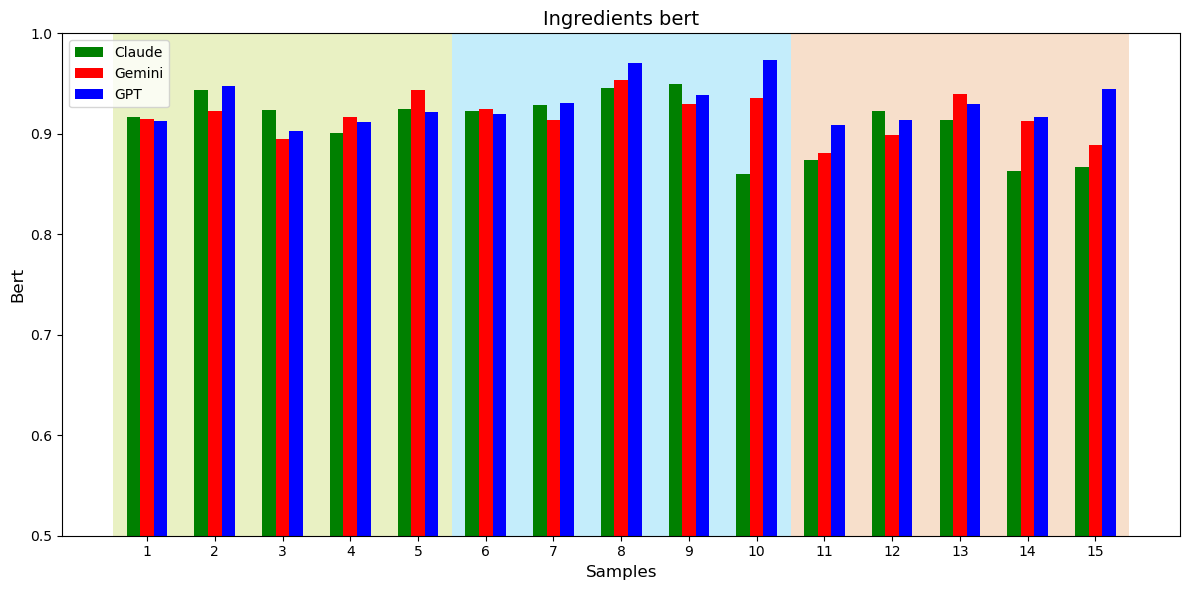

In [21]:
import matplotlib.pyplot as plt
x = list(range(1, 16))
x2 = [i + 0.2 for i in x]
x3 = [i - 0.2 for i in x]

fig, ax = plt.subplots(figsize=(12, 6))

color_map = {0: "#e9f1c3", 5: "#c4edfb", 10: "#f7dfcb"}

for i in range(0, 15, 5):
    ax.axvspan(i + 0.5, i + 5.5, facecolor=color_map[i], alpha=0.99)

# 畫長條圖
ax.bar(x3, claude_ing_bert_base_chinese, color='g', width=0.2, label='Claude')
ax.bar(x, gemini_ing_bert_base_chinese, color='r', width=0.2, label='Gemini')
ax.bar(x2, gpt_ing_bert_base_chinese, color='b', width=0.2, label='GPT')

# 加上 legend、標題與格式調整
ax.legend()
ax.set_xticks(range(1, 16))
ax.set_xlabel('Samples', fontsize=12)
ax.set_ylabel('Bert', fontsize=12)
ax.set_title('Ingredients bert', fontsize=14)
ax.set_ylim(0.5, 1.0)

plt.tight_layout()
plt.savefig('ing_bert.png')

## Cooking Instructions

### bert_base_chinese

In [19]:
gpt_instrc_bert_base_chinese = []
gemini_instrc_bert_base_chinese = []
claude_instrc_bert_base_chinese = []

def bert_base_chinese_for_instrc_sentence(gt_instrc_sentence, model_instrc_sentence):
    print(gt_instrc_sentence)
    print(model_instrc_sentence)
    
    tokenizer = AutoTokenizer.from_pretrained("bert-base-chinese")
    model = AutoModel.from_pretrained("bert-base-chinese")


    inputs = tokenizer(gt_instrc_sentence, return_tensors="pt", truncation=True, padding=True)
    with torch.no_grad():
        outputs = model(**inputs)
    gt_embeddinstrc = outputs.last_hidden_state[:, 0, :]  # shape: [1, hidden_size]

    inputs = tokenizer(model_instrc_sentence, return_tensors="pt", truncation=True, padding=True)
    with torch.no_grad():
        outputs = model(**inputs)
    model_embeddinstrc = outputs.last_hidden_state[:, 0, :]  # shape: [1, hidden_size]
        
    # 計算餘弦相似度（值域 -1 到 1，越接近 1 越相似）
    similarity = F.cosine_similarity(gt_embeddinstrc, model_embeddinstrc)
    print(f"相似度: {similarity.item():.4f}")
    return similarity.item()

def get_instrc_bert_base_chinese(gt_instrc_sentence_dic, model_instrc_sentence_dic):
    instrc_bert_base_chinese = []
    for gt_id, model_id in zip(gt_instrc_sentence_dic, model_instrc_sentence_dic):
        sentence1 = gt_instrc_sentence_dic[gt_id]
        sentence2 = model_instrc_sentence_dic[model_id]
        print(sentence1)
        print(sentence2)
        instrc_bert_base_chinese.append(bert_base_chinese_for_instrc_sentence(sentence1, sentence2))
    return instrc_bert_base_chinese

gpt_instrc_bert_base_chinese = get_instrc_bert_base_chinese(gt_instrc_sentence_dic, gpt_instrc_sentence_dic)
gemini_instrc_bert_base_chinese = get_instrc_bert_base_chinese(gt_instrc_sentence_dic, gemini_instrc_sentence_dic)
claude_instrc_bert_base_chinese = get_instrc_bert_base_chinese(gt_instrc_sentence_dic, claude_instrc_sentence_dic)

print(f'gpt_instrc_bert_base_chinese = {gpt_instrc_bert_base_chinese}')
print(f'gemini_instrc_bert_base_chinese = {gemini_instrc_bert_base_chinese}')
print(f'claude_instrc_bert_base_chinese = {claude_instrc_bert_base_chinese}')

小黃瓜洗淨後，去除頭尾，然後以菜刀拍碎; 將拍碎的小黃瓜切小段; 加入細砂糖拌勻，去菁15分鐘; 辣椒清洗後切成辣椒圈; 蒜頭清洗後切成蒜末; 用手將小黃瓜多餘的水份擠出，然後倒掉; 加入辣椒圈和蒜末; 加入醬油; 加入烏醋; 加入鹽; 淋上加熱後的植物油(淋熱油); 將所有食材拌勻即可食用; 於冰箱醃漬2小時以上會更入味更好吃; 
將五花肉切成小丁，紅蔥頭切片、蒜頭拍碎。熱鍋加少許油，爆香紅蔥頭與蒜頭，加入五花肉煎炒至出油上色。加入醬油、米酒、冰糖、白胡椒粉繼續拌炒。加入水後轉中小火燉煮約40分鐘，期間可放入滷蛋一起滷製。完成後將滷肉盛於白飯上，即可享用。
小黃瓜洗淨後，去除頭尾，然後以菜刀拍碎; 將拍碎的小黃瓜切小段; 加入細砂糖拌勻，去菁15分鐘; 辣椒清洗後切成辣椒圈; 蒜頭清洗後切成蒜末; 用手將小黃瓜多餘的水份擠出，然後倒掉; 加入辣椒圈和蒜末; 加入醬油; 加入烏醋; 加入鹽; 淋上加熱後的植物油(淋熱油); 將所有食材拌勻即可食用; 於冰箱醃漬2小時以上會更入味更好吃; 
將五花肉切成小丁，紅蔥頭切片、蒜頭拍碎。熱鍋加少許油，爆香紅蔥頭與蒜頭，加入五花肉煎炒至出油上色。加入醬油、米酒、冰糖、白胡椒粉繼續拌炒。加入水後轉中小火燉煮約40分鐘，期間可放入滷蛋一起滷製。完成後將滷肉盛於白飯上，即可享用。
相似度: 0.7873
把紅蔥頭切細剁碎，蒜頭切末。把豬肉先切成1公分厚片，再切成肉條。等到鍋子燒熱，不用放油，五花肉下鍋鋪平、均勻受熱，翻炒到肉呈白色。繼續翻炒豬肉，炒出透明的豬油，把紅蔥頭倒入、炒出濃郁的油蔥香，再放入蒜末一起拌炒。把豬肉推到旁邊，放入冰糖、黑糖，加熱到融化冒泡、變成焦糖，再把豬肉一起翻拌、讓焦糖均勻附著。倒入醬油，先炒出醬油的香氣、再加水慢燉。嗆入米酒，把滷肉移到深鍋中，水加到淹過豬肉，加入白胡椒粉、五香粉、八角、香葉、水煮蛋，沸騰後轉小火滷1小時。滷到上色後，開大火收汁直到醬汁濃稠，整鍋滷肉靜置2~3小時。
將五花肉切成小丁，紅蔥頭與蒜頭切碎。熱鍋後加入少許油，先將紅蔥頭與蒜頭炒香，再加入五花肉炒至變色並略出油。加入醬油、冰糖、米酒、水、五香粉與白胡椒粉，攪拌均勻後轉小火燉煮約60分鐘，期間可加入滷蛋一同煮至入味。小黃瓜切片備用。將煮好的滷肉淋在白飯上，搭配滷蛋與小黃瓜片即可享用。
把紅蔥頭切細剁碎，蒜頭切末。把豬肉先切成1公分厚片

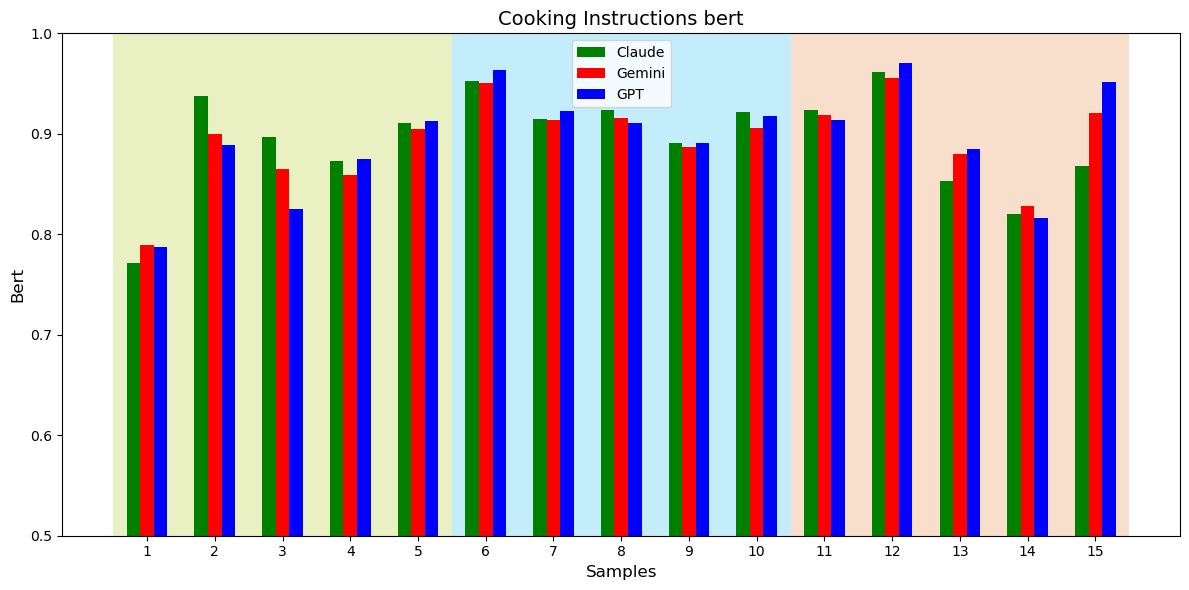

In [20]:
x = list(range(1, 16))
x2 = [i + 0.2 for i in x]
x3 = [i - 0.2 for i in x]

fig, ax = plt.subplots(figsize=(12, 6))

color_map = {0: "#e9f1c3", 5: "#c4edfb", 10: "#f7dfcb"}

for i in range(0, 15, 5):
    ax.axvspan(i + 0.5, i + 5.5, facecolor=color_map[i], alpha=0.99)

# 畫長條圖
ax.bar(x3, claude_instrc_bert_base_chinese, color='g', width=0.2, label='Claude')
ax.bar(x, gemini_instrc_bert_base_chinese, color='r', width=0.2, label='Gemini')
ax.bar(x2, gpt_instrc_bert_base_chinese, color='b', width=0.2, label='GPT')

# 加上 legend、標題與格式調整
ax.legend()
ax.set_xticks(range(1, 16))
ax.set_xlabel('Samples', fontsize=12)
ax.set_ylabel('Bert', fontsize=12)
ax.set_title('Cooking Instructions bert', fontsize=14)
ax.set_ylim(0.5, 1.0)

plt.tight_layout()
plt.savefig('instrc_bert.png')